In [10]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [14]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [3]:
df['Age'].fillna(df['Age'].median(),inplace=True)

C:\Users\rayyy\AppData\Local\Temp\ipykernel_12188\1527141296.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(),inplace=True)


## Ploting KDE and QQ plots

In [8]:
def plot_distribution(col):
    plt.figure(figsize=(12,3))
    plt.subplot(1,2,1)
    sns.histplot(df[col],kde=True)
    plt.subplot(1,2,2)
    stats.probplot(df[col],dist='norm',plot=plt)
    plt.show()

### Before function tranformation

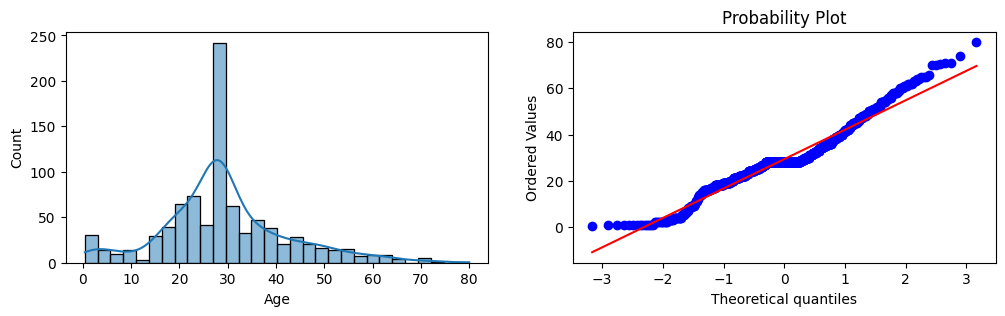

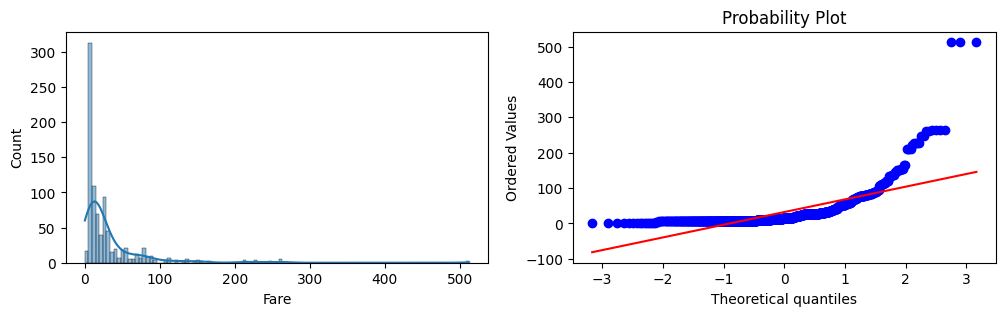

In [9]:
plot_distribution('Age')
plot_distribution('Fare')

### After Function Tranformation

In [17]:
from sklearn.preprocessing import FunctionTransformer
tnf=FunctionTransformer(func=np.log1p, inverse_func=np.expm1, validate=True)
fare_transformed=tnf.fit_transform(df[['Fare']])
age_transformed=tnf.fit_transform(df[['Age']])

C:\Users\rayyy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but FunctionTransformer was fitted with feature names
  warnings.warn(
C:\Users\rayyy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but FunctionTransformer was fitted with feature names
  warnings.warn(


In [19]:
def plot_distribution_values(col):
    plt.figure(figsize=(12,3))
    plt.subplot(1,2,1)
    sns.histplot(col,kde=True)
    plt.subplot(1,2,2)
    stats.probplot(col,dist='norm',plot=plt)
    plt.show()

In [22]:
fare_transformed.shape

(891, 1)

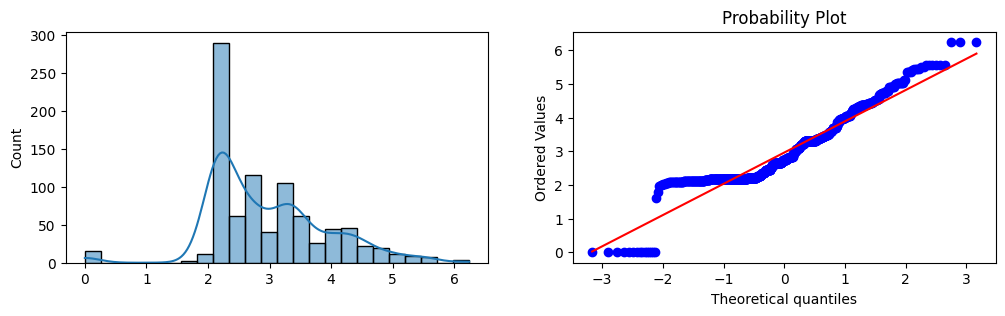

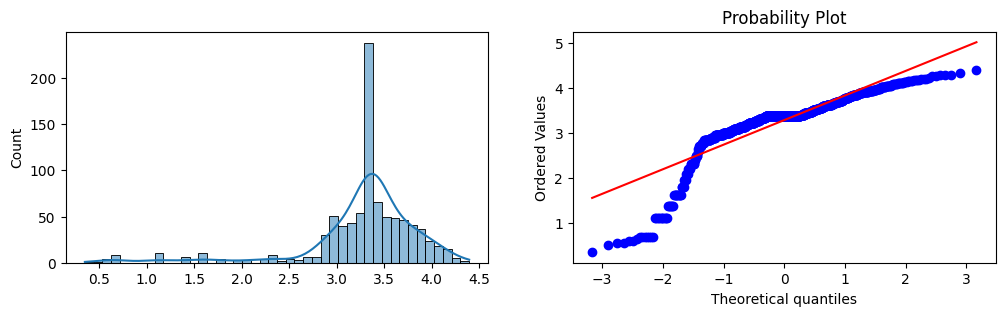

In [25]:
plot_distribution_values(fare_transformed.flatten())
plot_distribution_values(age_transformed.flatten())

## QQ Plot comparision

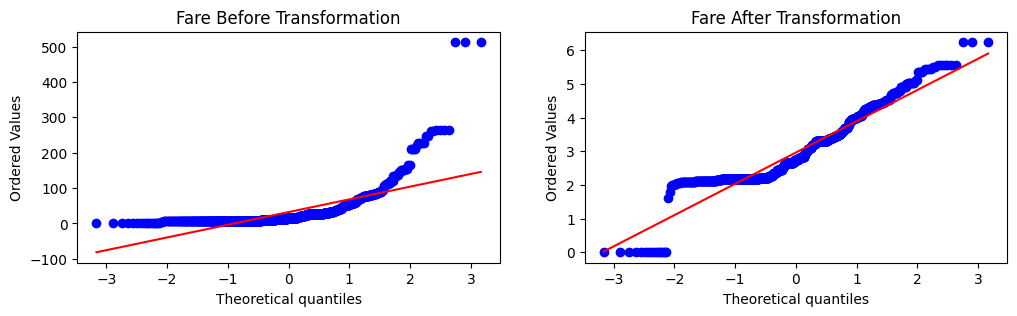

In [28]:
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
stats.probplot(df['Fare'],dist='norm',plot=plt)
plt.title('Fare Before Transformation')
plt.subplot(1,2,2)
stats.probplot(fare_transformed.flatten(),dist='norm',plot=plt)
plt.title('Fare After Transformation')
plt.show()

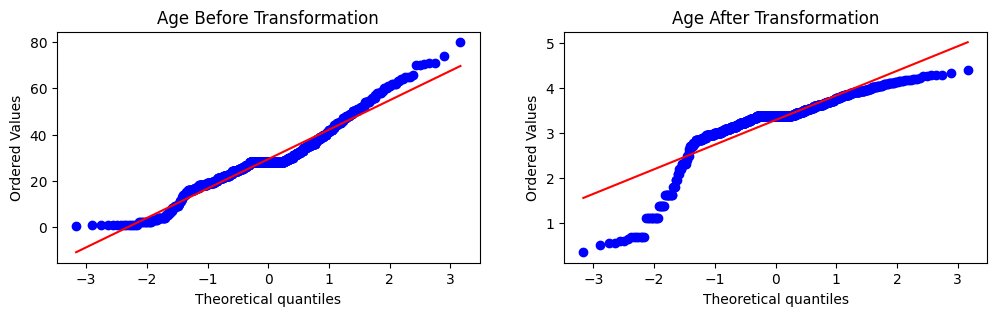

In [29]:
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
stats.probplot(df['Age'],dist='norm',plot=plt)
plt.title('Age Before Transformation')
plt.subplot(1,2,2)
stats.probplot(age_transformed.flatten(),dist='norm',plot=plt)
plt.title('Age After Transformation')
plt.show()